# **1. Clustering**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
fruits = np.load('data/fruits_300.npy')

In [26]:
fruits.shape # (300,100,100) : 샘플개수, 이미지높이, 이미지 너비

(300, 100, 100)

In [27]:
 # 첫번째 사진의 50번째줄
fruits[0,50]

array([  5,   1,   1,   3,   2,  45,  84,  78,  76,  74,  76,  75,  74,
        75,  72,  67,  65,  65,  64,  63,  62,  60,  59,  62,  58,  55,
        54,  54,  53,  52,  50,  49,  51,  52,  53,  53,  54,  56,  59,
        62,  65,  67,  71,  74,  76,  79,  83,  86,  90,  94,  97,  99,
       102, 105, 108, 112, 115, 120, 124, 127, 133, 138, 143, 149, 155,
       156, 157, 162, 170, 174, 175, 176, 181, 187, 194, 201, 204, 206,
       210, 216, 222, 225, 228, 232, 234, 236, 237, 237, 237, 235, 237,
       238, 234, 229, 114,   1,   1,   1,   1,   1], dtype=uint8)

### 1-1. imshow
- Matplotlib 라이브러리에서 이미지를 시각화할 때 사용되는 함수

<function matplotlib.pyplot.show(close=None, block=None)>

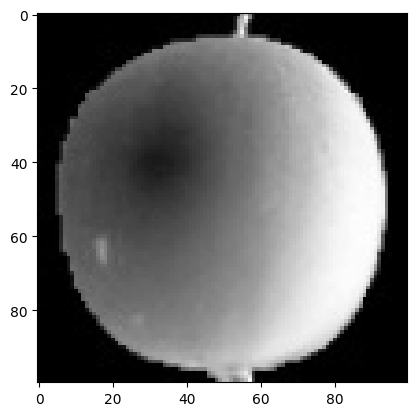

In [28]:
plt.imshow(fruits[0], cmap='gray')
plt.show
# 밝은 색: 높은 값
# 어두운 색: 낮은 값
# 바탕이 아닌, 사과가 중요하므로 바탕을 검게 만든다

### 1-2. 여러개의 plot 그리기

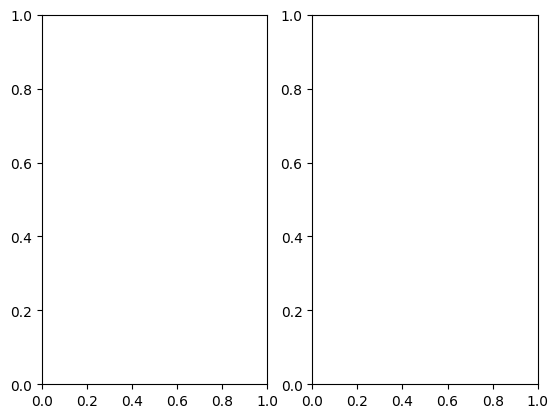

In [32]:
fig, axs = plt.subplots(1,2) 
# fig : 여러개의 서브플롯을 포함하는 큰 그림
# axis : 각 서브플롯을 나타내는 객체들을 담은 배열
# plt.subplots(1,2) : 1행 2열짜리 서브플롯을 생성하겠다

<function matplotlib.pyplot.show(close=None, block=None)>

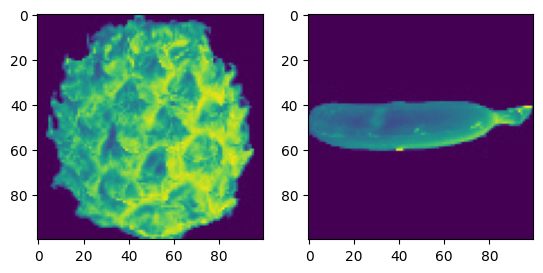

In [33]:
fig, axs = plt.subplots(1,2) 
axs[0].imshow(fruits[100])
axs[1].imshow(fruits[200])
plt.show

### 1-3. 이미지 데이터 분석하기

#### 1차원 배열로 만들기

In [35]:
apple = fruits[0:100].reshape(-1,100*100)
pine = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

#### 과일 **샘플별 평균** 계산해서 히스토그램 그리기

In [37]:
apple.mean(axis=1) #axis=1 : 가로방향으로 계산

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

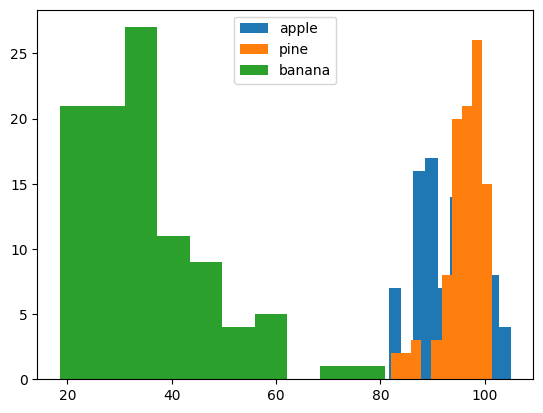

In [41]:
plt.hist(np.mean(apple, axis=1))
plt.hist(np.mean(pine, axis=1))
plt.hist(np.mean(banana, axis=1))
plt.legend(['apple', 'pine','banana'])
plt.show()

### 과일 **픽셀별 평균** 계산해서 대표이미지 그리기

In [46]:
apple

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(100, 10000), dtype=uint8)

In [48]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pine_mean = np.mean(pine, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

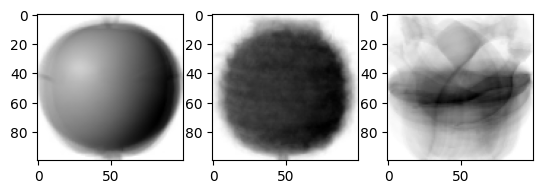

In [51]:
fig, axs = plt.subplots(1,3) # 1행 3열짜리 빈 그래프 만들기
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pine_mean,cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 1-4. 평균값과 가장 가까운 사진 고르기

In [58]:
# 각 이미지의 픽셀 값과 apple_mean 값의 차이를 절댓값으로 나타냄
abs_diff = np.abs(fruits - apple_mean) # abs :절댓값 반환
# 각 이미지의 절댓값 차이에 대한 평균 (작을수록 사과랑 비슷함)
abs_mean = np.mean(abs_diff, axis=(1,2))
# abs_diff는 (300,100,100)의 배열, 평균을 구하기 위해 axis=1, axis=2 가 필요

In [59]:
# 사과와 차이가 가장 적게 나는 이미지 선택
apple_list = np.argsort(abs_mean)[0:100] # 오름차순

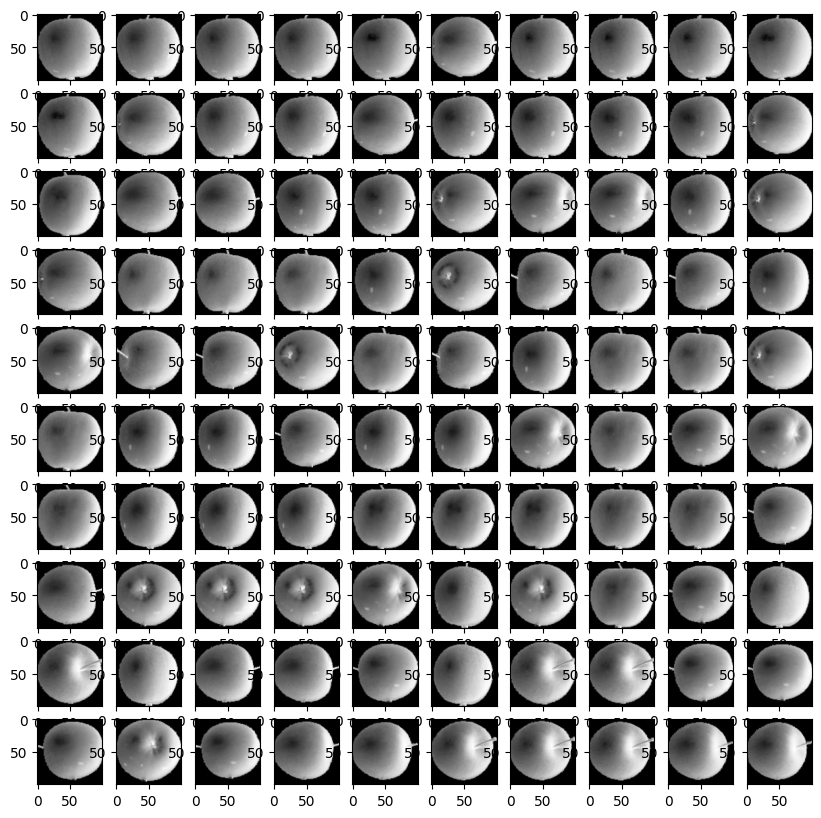

In [60]:
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_list[i*10 + j]], cmap='gray')

plt.show() 

# 사진을 출력하는 코드는 잘 몰라도 됨

# **2. K-means**
- 1. 무작위로 k개의 centroid 정하기
- 2. 가장 가까운 centroid로 클러스터 할당
- 3. 클러스터에 속한 샘플들의 평균값으로 centroid 변경
- 4. centroid 변화가 없을때까지 반복

In [61]:
fruits_2d = fruits.reshape(-1, 100*100)

In [63]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [64]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

### 2-1. 최적의 k값 찾기

<function matplotlib.pyplot.show(close=None, block=None)>

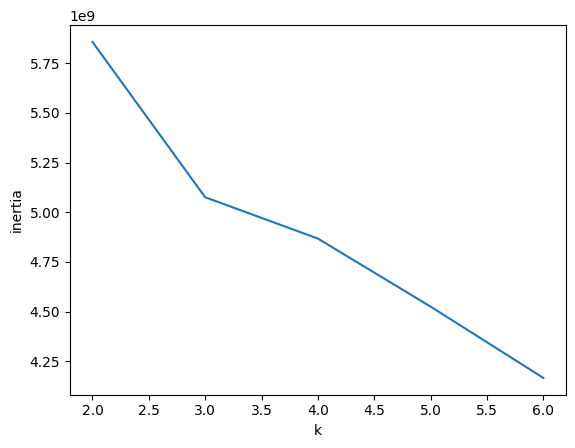

In [68]:
inertia=[]
for k in range(2,7):
    km = KMeans(n_clusters = k) #k값 변화주기
    km.fit(fruits_2d)  #모델 훈련시키기
    inertia.append(km.inertia_) #inertia_값을 추가
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show

In [ ]:
# **3. PCA**